<h1 style="text-align: center; font-weight: bolder">
    PCA
</h1>

**Análisis de Componentes Principales**

**¿Cuándo usar PCA?**

- El dataset tiene muchos features
- Hay correlación entre los features
- Existe Overfitting
- El modelo genera un alto costo computacional

**Procedimiento**

1. Calculamos la matriz de Covarianza para expresar la relación de nuestros features.
2. Hallamos los vectores propios y valores propios de esta matriz para medir la fuerza y variabilidad de estas relaciones.
3. Ordenamos y escogemos los vectores propios con mayor variabilidad, esto es, que aportan más información.

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sklearn

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## **Datos**

### **1. Cargue de los datos**

In [14]:
# Cargamos nuestro dataset
df = pd.read_csv('./data/heart.csv')

In [9]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1


In [20]:
# Separamos los features del target de nuestro dataset
features = df.drop(['target'], axis=1)
target = df['target']

In [11]:
features.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
23,63,0,2,135,252,0,0,172,0,0.0,2,0,2


### **2. Limpieza de los datos**

In [25]:
# Normalizamos los datos
normal_features = StandardScaler().fit_transform(features)

In [33]:
# Separamos nuestro dataset entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(normal_features, target, test_size=0.3, random_state=13)

### **3. Análisis de Componentes Principales**

In [77]:
# Configuramos el algoritmo
pca = PCA(n_components=3) 

In [78]:
# Entrenamos el algoritmo
pca.fit(X_train)

PCA(n_components=3)

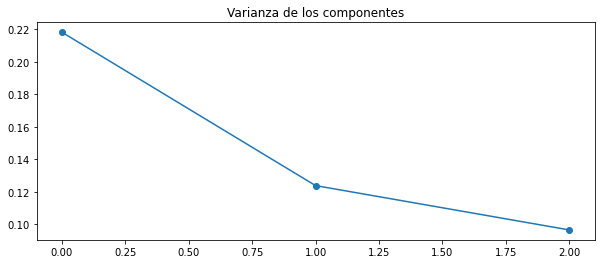

In [79]:
fig, axis = plt.subplots(figsize=(10, 4))

plt.plot(
    range(0, len(pca.explained_variance_)),
    pca.explained_variance_ratio_,
    marker='o')

plt.title('Varianza de los componentes')
plt.show()

El  valor del eje y, el **ratio de varianza**, nos demuestra cuanta información  nos aporta cada componente

In [81]:
# Aplicamos el algoritmo PCA a nuestro dataset
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### **Análisis de Componentes Principales Incremental**

In [39]:
# Configuramos el algoritmo Incremental PCA
i_pca = IncrementalPCA(n_components=3, batch_size=10)

In [40]:
i_pca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

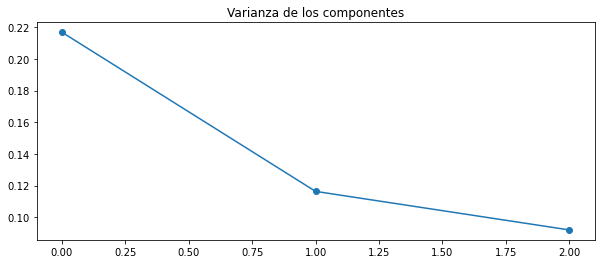

In [72]:
fig, axis = plt.subplots(figsize=(10, 4))

plt.plot(
    range(0, len(i_pca.explained_variance_)),
    i_pca.explained_variance_ratio_,
    marker='o')

plt.title('Varianza de los componentes')
plt.show()

In [90]:
# Aplicamos el algoritmo PCA a nuestro dataset
X_train_ipca = i_pca.transform(X_train)
X_test_ipca = i_pca.transform(X_test)

### **4. Modelo de Regresión Logística**

#### **Con PCA**

In [93]:
# Instanciamos el modelo
logistic_reg = LogisticRegression(solver='lbfgs')

In [94]:
# Entrenamos el modelo
logistic_reg.fit(X_train_pca, y_train)

LogisticRegression()

In [95]:
# Evaluamos el score de nuestro modelo
logistic_reg.score(X_test_pca, y_test)

0.8344155844155844

#### **Con IPCA**

In [96]:
# Instanciamos el modelo
logistic_reg = LogisticRegression(solver='lbfgs')

In [97]:
# Entrenamos el modelo
logistic_reg.fit(X_train_ipca, y_train)

LogisticRegression()

In [98]:
# Evaluamos el score de nuestro modelo
logistic_reg.score(X_test_ipca, y_test)

0.8409090909090909